<div class="alert alert-block alert-success">
    

## <center> Hash Table</center>
</div>
    
    

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import string
import random
from collections import Counter
SEED = 213
random.seed(SEED)

The linear search function below will run through a list, or array,of numbers/strings and pull the index where a select number/string was found, similar to the bimary search function. But a linear search runs through each index beginning with the first index and searching until it finds the select number. For example, given a list of sorted numbers 1 through 100, it will first search 1, then 2, then 3, then so on until it finds the select number. Thus, if the number being search for is 100, it will take 100 steps to find the number, whereas the binary search will only take 7 steps.

In [2]:
# linear search
# runs through each index, beginning with the first index, and searching until it finds the selected element
def linear_search(mylist, item):
    for i in range(len(mylist)):
        if mylist[i]==item:
            return i
    return None

The binary search function below will run through a list, or array, of numbers/strings and pull the index where a select number/string was found. If not found, it will return none. This is an incredibly powerful algorithm. For example, given a list of sorted numbers 1 through 100, the algorithm will begin its search for the select number at the middploint, position 50. If the number at position 50 is higher than the select number, all positions 50 and above have now been eliminated. If the number at position 50 is lower than the select number, all position 50 and below have now been eliminated. Every time, you guess the middle number and eliminate half the remaining numbers. Thus, if the number being searched for is 100, it will take only 7 steps to find the number.

In [3]:
# Bhargava's imlementation of binary search
def binary_search(mylist, item):
    # low and high keep track of which part of the list you'll search in.
    low = 0
    high = len(mylist) - 1

    # While you haven't narrowed it down to one element ...
    while low <= high:
        # ... check the middle element
        mid = (low + high) // 2
        guess = mylist[mid]
        # Found the item.
        if guess == item:
            return mid
        # The guess was too high.
        if guess > item:
            high = mid - 1
        # The guess was too low.
        else:
            low = mid + 1

    # Item doesn't exist
    return None

To create a list of 100,000 random names, assign random letters to a list and join them to create one single string. Do so until the list for names is filled with 100,000 random names.

In [4]:
# Requirement: 
# Create a list of 100,000 names (randomly pick 10 characters e.g. abcdefghij) 

names = []

for i in range(100000):
    names_temp = []
    for j in range(10):
        names_temp.append(random.choice(string.ascii_lowercase))
    names.append(''.join(names_temp))

# confirm requirement
cc = Counter([len(xx) for xx in names])
print(f'The list contains {list(cc.values())[0]} random names and each name contains\
{list(cc.keys())[0]} characters')

if len(names) == len(set(names)):
    print('The list contains no duplicates')
else:
    print('The list contains duplicates')
    
print('First 10 names:')
names[:10]

The list contains 100000 random names and each name contains10 characters
The list contains no duplicates
First 10 names:


['enhjagnrqj',
 'flnqgtkroo',
 'wzgzsvsszj',
 'ydxikvgsor',
 'kdlilmauqm',
 'idzwevxuii',
 'tcedtzfjdg',
 'ztavhqtfnj',
 'rahzjyypau',
 'dkthbcvupk']

In [5]:
# Requirement: 
# Pick the names from the unsorted array that are at 10,000th, 30,000th, 50,000th, 
# 70,000th, 90,000th, and 100,000th positions

# Search for these 6 names in the 1ist of 100,000 names 
names_search = [names[10000-1], names[30000-1], names[50000-1],
                names[70000-1], names[90000-1], names[100000-1]]
print('names to search:')
names_search

names to search:


['gixftvgphm',
 'oewgjdwlzu',
 'neznzkkgef',
 'amfnacqvxx',
 'pcwapxiolz',
 'gtviapbtte']

Search the 6 names in the list of names using linear search. Record the execution time in milliseconds for each name search and add up the amount of time. Repeat this 1000 times and take the average execution time. 

In [6]:
# Requirement: Execute Linear search on a Unsorted list of names (experiment 1 of 2)

linear_search_times = []

for i in range(1000):
    linear_search_time = 0
    for j in range(len(names_search)):
        start = time.perf_counter()
        linear_search(names, names_search[j])
        end = time.perf_counter()
        linear_search_time += ((end - start) * 1000)
    linear_search_times.append(linear_search_time)
    
linear_search_time = np.mean(linear_search_times)

A dictionary in python is used as a hash table. It is simple and very efficient in searching for items such as names in a dictionary. The function below will search the dictionary and return the value corresponding to the name in the dictionary.

In [7]:
# functions for dictionary lookup

def dict_search_list(dictionary, items):
    # to accomodate the code in cell [9] below, 
    # this function looks up multiple keys in a list and returns their values
    # returns None if item not found
    return [dictionary.get(xx) for xx in items]
    
def dict_search(dictionary, item):
    # this function looks up a key and returns its value
    # returns None if item not found
    return dictionary.get(item)

First store the list of names in a dictionary. Each name will have a random value assigned to it in the dicitonary. Next, search for the 6 names in the dictionary and return the execution time in milliseconds. Repeat this 1000 times and take the average execution time. 

In [8]:
# get dictionary from list of unsorted names
names_dict = {k: v for v, k in enumerate(names)}

In [9]:
# Requirement: Execute Dictionary search/lookup on a Unsorted list of names (experiment 2 of 2)

dict_times = []

for i in range(1000):
    start = time.perf_counter()
    dict_search_list(names_dict, names_search)
    end = time.perf_counter()
    dict_times.append((end - start) * 1000)

dict_search_time = np.mean(dict_times)

# Note: the provided code in this cell differs from the approach of the provided code in cell [6].
# In cell [6], the linear_search function was called multiple times (looping through j), 
# and search time for each name was added up.

# Here, for dictionary lookup, there is no inner loop (iterating j) and the dict_search_list function 
# was only called once, on a list of names. 

# I added another experiment below, in which dictionary lookup was also performed multiple times
# (looping through j) and search time for each name was added up. 

# This second approach may more closely resemble those of linear search and binary search, 
# both of which searches for one item (e.g. name_search[j]), not a list of items (e.g., name_search)

In [10]:
# Requirement: Execute Dictionary search/lookup on a Unsorted list of names (experiment 2 of 2)
# (alternative method; see explanation above)

dict_search2_times = []

for i in range(1000):
    dict_search2_time = 0
    for j in range(len(names_search)):
        start = time.perf_counter()
        dict_search(names_dict, names_search[j])
        end = time.perf_counter()
        dict_search2_time += ((end - start) * 1000)
    dict_search2_times.append(dict_search2_time)
    
dict_search2_time = np.mean(dict_search2_times)

In [11]:
# confirm that each "time" list contains the expected number of elements
assert len(linear_search_times) == len(dict_times) ==\
len(dict_search2_times) == 1000

In [12]:
# Requirement: Create the comparative analysis table

method = ['Linear Search', 'Dictionary Search1', 'Dictionary Search2']
times = [linear_search_time, dict_search_time, dict_search2_time]

df1 = pd.DataFrame({'Search method':method, 'Execution time':times})
df1

,Search method,Execution time
0,Linear Search,16.929566
1,Dictionary Search1,0.000736
2,Dictionary Search2,0.001397


Plot the execution time in milliseconds for the search of the 6 random names using linear search and dictionary search. As seen below, the dictionary search was much quicker than the linear search. Linear search has a Big O notation of O(n), which means that it will begin its search at the first index, then the second, and so on until it finds the value being searched for. So if the name is in the 50th index, it will take 50 steps to find the name. However, the dictionary knows exactly where the name is and will return its value almost immediately since it doesn't have to search through the dictionary for the name. It just simply knows where it is. 

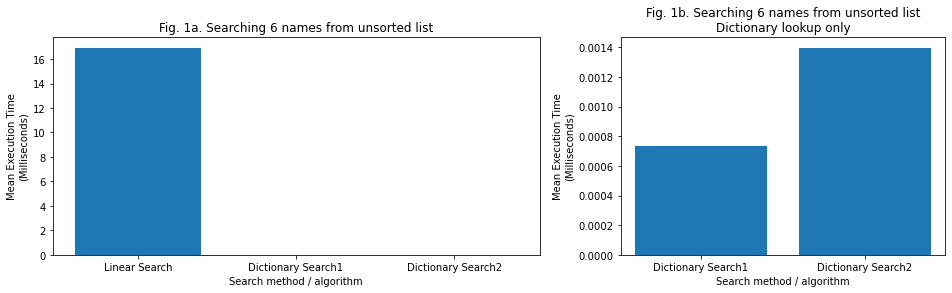

In [13]:
# Requirement: Create chart to plot the execution time for the different algorithms

fig, axs = plt.subplots(1,2, figsize=(16,4), gridspec_kw={'width_ratios': [3, 2]})
axs[0].bar(x=method, height=times)
axs[0].set_title('Fig. 1a. Searching 6 names from unsorted list')
axs[1].bar(x=method[1:], height=times[1:])
axs[1].set_title('Fig. 1b. Searching 6 names from unsorted list\nDictionary lookup only')
for ax in axs:
    ax.set(ylabel='Mean Execution Time\n(Milliseconds)', xlabel='Search method / algorithm')
plt.show()

Use any sort algorithm to sort the list of names 

In [14]:
# Bhargava's imlementation of quicksort
def quick_sort(array):
  if len(array) < 2:
    # base case, arrays with 0 or 1 element are already "sorted"
    return array
  else:
    # recursive case
    pivot = array[0]
    # sub-array of all the elements less than the pivot
    less = [i for i in array[1:] if i <= pivot]
    # sub-array of all the elements greater than the pivot
    greater = [i for i in array[1:] if i > pivot]
    return quick_sort(less) + [pivot] + quick_sort(greater)

In [15]:
# sort the list of names using quicksort
# rationale: quicksort “is one of the fastest sorting algorithms out there” (Bhargava, 2016)
start = time.perf_counter()
names_sorted = quick_sort(names)
end = time.perf_counter()
print('Execution time for sorting (quicksort): {:.0f} milliseconds'.format((end - start) * 1000))

Execution time for sorting (quicksort): 240 milliseconds


Grab the names at the 10,000th, 30,000th, 50,000th, 70,000th, 90,000th, and 100,000th position to be searched for. 

In [16]:
# Pick the names from the sorted array that are at 
# 10,000th, 30,000th, 50,000th, 70,000th, 90,000th, and 100,000th positions

# Search for these 6 names in the 1ist of 100,000 names 
temp_names = [names_sorted[10000-1], names_sorted[30000-1], names_sorted[50000-1],
              names_sorted[70000-1], names_sorted[90000-1], names_sorted[100000-1]]
print('names to search:')
temp_names

names to search:


['cqaisringb',
 'hvsfjxckrp',
 'nbldjfuhgm',
 'sggolgibhr',
 'xlaytjytlv',
 'zzzohpicwy']

Search the names at these positions using linear search. Record the execution time in milliseconds for each name search and add up the amount of time. Repeat this 1000 times and take the average execution time. 

In [17]:
# Requirement: Execute Linear search on a sorted list of names (experiment 1 of 3)

linear_search_times_sorted = []

for i in range(1000):
    linear_search_time_sorted = 0
    for j in range(len(temp_names)):
        start = time.perf_counter()
        linear_search(names_sorted, temp_names[j])
        end = time.perf_counter()
        linear_search_time_sorted += ((end - start) * 1000)
    linear_search_times_sorted.append(linear_search_time_sorted)

linear_search_time_sorted = np.mean(linear_search_times_sorted)

Search the names at these positions using binary search. Record the execution time in milliseconds for each name search and add up the amount of time. Repeat this 1000 times and take the average execution time. 

In [18]:
# Requirement: Execute Binary search on a sorted list of names (experiment 3 of 3)

binary_search_times = []

for i in range(1000):
    binary_search_time = 0
    for j in range(len(temp_names)):
        start = time.perf_counter()
        binary_search(names_sorted, temp_names[j])
        end = time.perf_counter()
        binary_search_time += ((end - start) * 1000)
    binary_search_times.append(binary_search_time)

binary_search_time = np.mean(binary_search_times)

Search for the names at these positions in the dictionary and return the execution time in milliseconds. Repeat this 1000 times and take the average execution time. 

In [19]:
# A dictionary of sorted names could be created:
# names_sorted_dict = {k: v for v, k in enumerate(names_sorted)}

# Here, for the purpose of getting the lookup times, I have used the same dictionary object "names_dict" 
# that was created and used above, as demonstrated in the Sync Session/assignment walkthrough.

# The only difference between using "names_dict" vs. using "names_sorted_dict" would be that 
# different values would be returned when performing the lookup.
# Here, searching for "temp_names" using "names_dict" returns indices 
# [15451, 39645, 83255, 62863, 68354, 51059], instead of 
# [9999, 29999, 49999, 69999, 89999, 99999] if "names_sorted_dict" is used.

In [20]:
# Requirement: Execute Dictionary search/lookup on the same dictionary object as above (experiment 2 of 3)
# looking up names in a list and returning a list of values

dict_times = []

for i in range(1000):
    start = time.perf_counter()
    dict_search_list(names_dict, temp_names) 
    end = time.perf_counter()
    dict_times.append((end - start) * 1000)

dict_search_time_sorted = np.mean(dict_times)

In [21]:
# Requirement: Execute Dictionary search/lookup on the same dictionary object as above (experiment 2 of 3)
# alternative method of looking up a name and returning a value, one name at a time

dict_search2_times_sorted = []

for i in range(1000):
    dict_search2_time_sorted = 0
    for j in range(len(temp_names)):
        start = time.perf_counter()
        dict_search(names_dict, temp_names[j])
        end = time.perf_counter()
        dict_search2_time_sorted += ((end - start) * 1000)
    dict_search2_times_sorted.append(dict_search2_time_sorted)

dict_search2_time_sorted = np.mean(dict_search2_times_sorted)

In [22]:
# confirm that each "time" list contains the expected number of elements
assert len(linear_search_times_sorted) == len(binary_search_times) ==\
len(dict_times) == len(dict_search2_times_sorted) == 1000

In [23]:
# Requirement: Create the comparative analysis table

method = ['Linear Search', 'Dictionary Search1', 'Dictionary Search2', 'Binary Search']
times = [linear_search_time_sorted, dict_search_time_sorted, dict_search2_time_sorted, binary_search_time]

df2 = pd.DataFrame({'Search method':method, 'Execution time':times})
df2

,Search method,Execution time
0,Linear Search,16.975678
1,Dictionary Search1,0.000711
2,Dictionary Search2,0.001400
3,Binary Search,0.014604


Plot the execution time for the search of the names at the specfified positions using linear search, binary search, and dictionary search. As seen below, the dictionary search was much quicker than the linear search and binary search. This is not surprising since as mentioned with the comparison above between dictionary and linear search, the dictionary search knows exactly where the name is and does not need to search through the dictionary. Thus, it has a Big O notation of O(1). Thus, if quick retrieval is important, it would be advised to store data in a dictionary since it has almost immediate retreival times. 

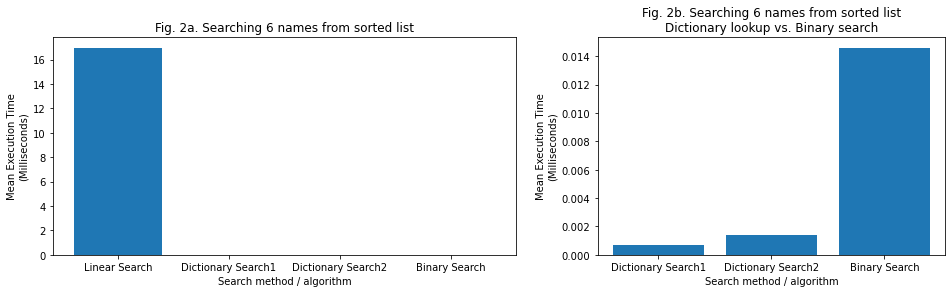

In [24]:
# Requirement: Create chart to plot the execution time for the different algorithms

fig, axs = plt.subplots(1,2, figsize=(16,4), gridspec_kw={'width_ratios': [4, 3]})
axs[0].bar(x=method, height=times)
axs[0].set_title('Fig. 2a. Searching 6 names from sorted list')
axs[1].bar(x=method[1:], height=times[1:])
axs[1].set_title('Fig. 2b. Searching 6 names from sorted list\nDictionary lookup vs. Binary search')
for ax in axs:
    ax.set(ylabel='Mean Execution Time\n(Milliseconds)', xlabel='Search method / algorithm')
plt.show()

<div class="alert alert-block alert-danger">
    
    

### Requirements: 
- Modify the provided code to to test the performance of different search algorihtms for different data structures
- Create a list of 100,000 names (randomly pick 10 characters e.g. abcdefghij)  
- Pick the names from the unsorted array that are at 10,000th, 30,000th, 50,000th, 70,000th, 90,000th, and 100,000th positions
- Search for these 6 names in the 1ist of 100,000 names generated above
- Run 2 Experiments - Execute Linear search, Dictionary search/lookup on a Unsorted list of names
- Run 3 Experiments - Execute Linear search, Dictionary search/lookup, and Binary search on a sorted list of names
- Create the comparative analysis table
- Create chart to plot the execution time for the different algorithms






<br>
    
</div>

#### Hash tables 
* In the average case, hash tables take O(1), or constant time. That is, the time taken will stay constant regardless of how big the hash table is. This applies for search, insert, and delete operations.
* In the worst case, hash tables take O(n) for search, insert, and delete operations. To prevent hitting the worst case performance, we need to avoid collisions. To avoid collisions, we need a low load factor and a good hash function. Generally, we can safely assume that whatever programming language we use, the built-in hash table will have good (i.e., average case/constant time) performance (Bhargava, 2016).

#### Dictionary search/lookup vs. linear search vs. binary search
* Python’s hash tables are called dictionaries. We would expect dictionary search/lookup to run at the average case performance of O(1) time (Bhargava, 2016). 
* As discussed in Assignment 1 (and also in the starter script), linear search has a time complexity of O(n) and binary search runs at O(log n). 

#### Results
<b>(1) Searching for 6 names in an unsorted list of length 100,000 (Fig. 1):</b>
* Mean execution time for dictionary lookup was much faster (orders of magnitude faster) than for linear search. 
* This was expected because “the dictionary knows exactly where the name is and will return its value almost immediately since it doesn't have to search through the dictionary for the name” (ref: starter script). 


<b>(2) Searching for 6 names in a sorted list of length 100,000 (Fig. 2):</b>
* Mean execution time for dictionary lookup was much faster (an order of magnitude to orders of magnitude faster) than for binary search and for linear search.
* As expected, binary search was much faster than linear search (but the former requires a sorted list).


<b>(3) Comparing Dictionary Search1 vs. Dictionary Search2:</b>
* Dictionary Search1 (searching a list of items by calling `dict_search_list()` once) was faster than Dictionary Search2 (searching individual items one at a time by calling `dict_search()` multiple times and adding up the search times). Both were much faster than linear search or binary search.


<b>(4) Comparing linear search and dictionary lookup on the unsorted vs. sorted list:</b>
* Using linear search, mean execution times on the unsorted list vs. the sorted list were comparable (both ~17 ms). This was expected because linear search runs through each index until it finds the element being searched for. Here, the elements being searched for were at the same specified indicies (10,000th, 30,000th, etc.) regardless of whether the list was sorted or not.
* For dictionary lookup, we used the same dictionary object to search for different names (look up different keys) when the list was unsorted vs. sorted. Regardless of what names/keys we look up, “the dictionary knows exactly where the name is and will return its value almost immediately since it doesn't have to search through the dictionary for the name” (ref: starter script). We would thus expect comparable mean execution times when looking up the 2 sets of names/keys.


<b>(5) Space/memory considerations:</b>
* We can use `sys.getsizeof()`, which returns the size of an object in bytes, to estimate the "storage size of a particular object that occupies some space in the memory" (ref: https://www.geeksforgeeks.org/how-to-find-size-of-an-object-in-python/). (Only the memory consumption directly attributed to the object is accounted for, not the memory consumption of objects it refers to.)
* Here, `sys.getsizeof(names) = 824472`, `sys.getsizeof(names_dict) = 5242984`, and `sys.getsizeof(names_sorted) = 800072`, suggesting that storing the names in a dictionary (for dictionary lookup) used more memory than storing the names in a list (for linear search or binary search).
* Python dictionaries and Python lists (internally represented as arrays; ref: https://www.geeksforgeeks.org/internal-working-of-list-in-python/) both have space complexity of O(n) (ref: https://www.bigocheatsheet.com/). Thus, as the dataset scales, the dictionary used in this experiment will likely continue to use more memory than the list.


#### Conclusions
* In the average case, hash tables are as fast as arrays at searching and as fast as linked lists at inserts and deletes. Indeed, “It’s the best of both worlds!” (Bhargava, 2016)


* Since linear search runs at O(n), binary search runs at O(log n), and dictionary lookup runs at O(1) in the average case, the difference in execution time between dictionary lookup and the other 2 search algorithms will only increase with increasing list lengths. Thus, if quick retrieval is important, and the dataset is large or scalability is important, data engineers should consider storing the data in a dictionary (as long as it doesn’t conflict with any other requirements). 


* While data engineers can safely assume that whatever programming language we use, the built-in hash table will have good (constant time) performance on average (Bhargava, 2016), we should still be aware that this may not <u>always</u> be the case for real-world applications.


* Finally, a dictionary may require more space/memory than a list, given the need to store both keys and values, in contrast to only values for lists. Thus, data engineers may also need to consider the tradeoff between time and space if such constraints exist.

#### References
* Bhargava, A. Y. (2016.) Grokking Algorithms: An Illustrated Guide for Programmers and Other Curious People. Shelter Island, N.Y.: Manning.
